In [2]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import os
import re

from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

from keras.applications.vgg16 import VGG16 
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle
import seaborn as sns

In [3]:
# Load the audio file
AUDIO_FILE = 'test/TunePocket-LoFi-HipHop-Chilax-Intro-Preview.mp3'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

/Users/shoheisuzuki/miniforge3/envs/music-recommendation/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [4]:
Audio(AUDIO_FILE)

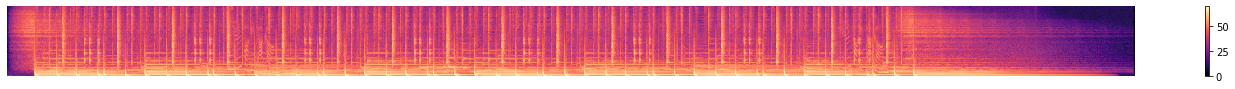

In [10]:
# Short-time Fourier transform
sgram = librosa.stft(samples)
# librosa.display.specshow(sgram)
magnitude, phase = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=magnitude, sr=sample_rate, n_mels=128, fmax=8000)

# mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
mel_sgram = librosa.power_to_db(mel_scale_sgram, ref=np.min)

# Image size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = float(mel_sgram.shape[1]) / float(100)
fig_size[1] = float(mel_sgram.shape[0]) / float(100)
plt.rcParams["figure.figsize"] = fig_size
plt.axis('off')
# plt.axes([0., 0., 1., 1.0], frameon=False, xticks=[], yticks=[])

librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='hz')
plt.savefig('test/'+'test'+'.png', bbox_inches=None, pad_inches=0)
plt.colorbar()

In [11]:
print(mel_sgram.shape)

(128, 2526)


## Load and transform all audio data

In [12]:
df = pd.read_csv('fma_metadata/tracks.csv',header=2, low_memory=False)
df.tail()

track_id  A                    B                    C    D  E      F  \
106569    155316  0  2017-03-30 15:20:35  2017-02-17 00:00:00  NaN  0  22940   
106570    155317  0  2017-03-30 15:20:35  2017-02-17 00:00:00  NaN  0  22940   
106571    155318  0  2017-03-30 15:20:35  2017-02-17 00:00:00  NaN  0  22940   
106572    155319  0  2017-03-30 15:20:35  2017-02-17 00:00:00  NaN  0  22940   
106573    155320  0  2017-03-26 16:22:18  2017-03-26 00:00:00  NaN  1  22906   

                                                        G     H            I  \
106569  <p>A live performance at Monty Hall on Feb 17,...  1506  Monty Hall    
106570  <p>A live performance at Monty Hall on Feb 17,...  1506  Monty Hall    
106571  <p>A live performance at Monty Hall on Feb 17,...  1506  Monty Hall    
106572  <p>A live performance at Monty Hall on Feb 17,...  1506  Monty Hall    
106573                                                NaN  7481          NaN   

        ...   AQ   AR   AS                                                 AT  \
106569  ...  NaN  122  NaN  Creative Commons Attribution-NonCommercial-NoD...   
106570  ...  NaN  194  NaN  Creative Commons Attribution-NonCommercial-NoD...   
106571  ...  NaN  214  NaN  Creative Commons Attribution-NonCommercial-NoD...   
106572  ...  NaN  336  NaN  Creative Commons Attribution-NonCommercial-NoD...   
106573  ...  NaN  972  NaN                          Attribution-NonCommercial   

         AU   AV AW   AX                                                 AY  \
106569  102  NaN  3  NaN                                                 []   
106570  165  NaN  4  NaN                                                 []   
106571  168  NaN  6  NaN                                                 []   
106572  294  NaN  5  NaN                                                 []   
106573  705  NaN  7  NaN  ['ballad', 'epic', 'rockabilly', 'curse', 'hex...   

                                            title  
106569                                  The Auger  
106570                            Let's Skin Ruby  
106571         My House Smells Like Kim Deal/Pulp  
106572                    The Man With Two Mouths  
106573  Another Trick Up My Sleeve (Instrumental)  

[5 rows x 53 columns]

In [13]:
# # Get Genres and Track IDs from the tracks.csv file
# filename_metadata = 'fma_metadata/tracks.csv'
# tracks = pd.read_csv(filename_metadata, header=2, low_memory=False)
# tracks_array = tracks.values
# tracks_id_array = tracks_array[: , 0]
# tracks_genre_array = tracks_array[: , 40]
# tracks_id_array = tracks_id_array.reshape(tracks_id_array.shape[0], 1)
# tracks_genre_array = tracks_genre_array.reshape(tracks_genre_array.shape[0], 1)

folder_sample = 'fma_small'
directories = [d for d in os.listdir(folder_sample) if os.path.isdir(os.path.join(folder_sample, d))]

# os.makedirs('Spectogram_Images')



In [14]:
# for d in directories:
#     label_directory = os.path.join(folder_sample, d)
#     file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory) if f.endswith('.mp3')]
#     for f in file_names:
#         # track_id = int(re.search('fma_small/.*/(.+?).mp3', f).group(1))
#         # track_index = list(tracks_id_array).index(str(track_id))
        
#         # if(str(tracks_genre_array[track_index, 0]) != '0'):
#             samples, sample_rate = librosa.load(f)
#             # Short-time Fourier transform
#             sgram = librosa.stft(samples)
#             # librosa.display.specshow(sgram)
#             magnitude, phase = librosa.magphase(sgram)
#             mel_scale_sgram = librosa.feature.melspectrogram(S=magnitude, sr=sample_rate, n_mels=128, fmax=8000)
            
#             # mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
#             mel_sgram = librosa.power_to_db(mel_scale_sgram, ref=np.min)
            
#             # Image size
#             fig_size = plt.rcParams['figure.figsize']
#             fig_size[0] = float(mel_sgram.shape[1]) / float(100)
#             fig_size[1] = float(mel_sgram.shape[0]) / float(100)
#             plt.rcParams["figure.figsize"] = fig_size
#             plt.axis('off')
#             # plt.axes([0., 0., 1., 1.0], frameon=False, xticks=[], yticks=[])

#             librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='hz')
#             plt.savefig('Spectogram_Images_2/'+str(f[14:20])+'.png', bbox_inches=None, pad_inches=0) #"_"+str(tracks_genre_array[track_index,0])+
#             print(f[14:20])
#             plt.close()


In [15]:
path = '/Users/shoheisuzuki/workspace/euclidean-eukalyptus/work/music-recommender/Spectogram_Images/'
# change the working directory to the path where the images are located
os.chdir(path)

songs = []
# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            songs.append(file.name)

In [16]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-03-07 12:08:43.261143: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-07 12:08:43.261531: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
data = {}
p = r'/Users/shoheisuzuki/workspace/euclidean-eukalyptus/work/music-recommender/model/audio_features.pkl'

# lop through each image in the dataset
for song in songs:
    feature = extract_features(song,model)
    data[song] = feature
# save the extracted features as a pickle file (optional)
with open(p,'wb') as file:
    pickle.dump(data,file)

2022-03-07 12:08:45.876124: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-07 12:08:45.996035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [19]:
with open(r'/Users/shoheisuzuki/workspace/euclidean-eukalyptus/work/music-recommender/model/audio_features.pkl', 'rb') as file:
    data = pickle.load(file)

In [20]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feature = np.array(list(data.values()))
feature.shape
# (210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feature = feature.reshape(-1,4096)
feature.shape

# # get the unique labels (from the flower_labels.csv)
# df = pd.read_csv('flower_labels.csv')
# label = df['label'].tolist()
# unique_labels = list(set(label))

(4834, 4096)

In [21]:
feature = pd.DataFrame(feature)
feature

0         1         2         3         4     5         6     7     \
0      0.0  0.276885  0.000000  0.525118  1.358259   0.0  5.603625   0.0   
1      0.0  2.639676  0.000000  1.443202  1.828559   0.0  5.724163   0.0   
2      0.0  2.475289  0.000000  1.703385  1.551151   0.0  4.414777   0.0   
3      0.0  1.155072  0.000000  0.213467  2.855101   0.0  5.501060   0.0   
4      0.0  1.419908  0.000000  0.596359  0.921858   0.0  6.341099   0.0   
...    ...       ...       ...       ...       ...   ...       ...   ...   
4829   0.0  1.134456  0.000000  1.257037  1.926351   0.0  6.060061   0.0   
4830   0.0  0.763911  0.000000  0.350312  2.407132   0.0  5.330967   0.0   
4831   0.0  2.380618  0.000000  1.237662  0.482639   0.0  7.054648   0.0   
4832   0.0  2.687991  0.000000  1.338039  0.954078   0.0  4.751172   0.0   
4833   0.0  2.410195  0.757577  0.154139  0.000000   0.0  5.577830   0.0   

      8     9     ...      4086  4087      4088      4089      4090      4091  \
0      0.0   0.0  ...  4.632590   0.0  0.000000  0.000000  2.574090  5.254221   
1      0.0   0.0  ...  4.982517   0.0  0.000000  0.223240  3.025865  4.277346   
2      0.0   0.0  ...  4.316081   0.0  0.000000  0.689943  3.871218  4.733443   
3      0.0   0.0  ...  5.347623   0.0  0.000000  0.847612  4.460057  5.816047   
4      0.0   0.0  ...  4.390624   0.0  0.000000  0.000000  3.033546  6.367900   
...    ...   ...  ...       ...   ...       ...       ...       ...       ...   
4829   0.0   0.0  ...  3.980004   0.0  0.000000  0.593295  3.709148  6.243112   
4830   0.0   0.0  ...  4.757872   0.0  0.000000  0.071882  3.476911  5.220980   
4831   0.0   0.0  ...  4.733780   0.0  0.000000  1.614663  4.179696  7.504448   
4832   0.0   0.0  ...  5.132657   0.0  0.000000  0.000000  2.285458  3.959879   
4833   0.0   0.0  ...  3.618307   0.0  0.124246  0.000000  2.146846  3.534673   

      4092      4093  4094  4095  
0      0.0  1.915181   0.0   0.0  
1      0.0  0.000000   0.0   0.0  
2      0.0  0.978004   0.0   0.0  
3      0.0  1.786599   0.0   0.0  
4      0.0  0.749969   0.0   0.0  
...    ...       ...   ...   ...  
4829   0.0  1.915098   0.0   0.0  
4830   0.0  1.952804   0.0   0.0  
4831   0.0  1.444176   0.0   0.0  
4832   0.0  2.182945   0.0   0.0  
4833   0.0  0.540203   0.0   0.0  

[4834 rows x 4096 columns]

In [22]:
pca = PCA(n_components=888, random_state=22) #n_components=
pca.fit(feature)
feature_new = pca.transform(feature)

In [23]:
with open(r'/Users/shoheisuzuki/workspace/euclidean-eukalyptus/work/music-recommender/model/pca','wb') as file:
    pickle.dump(pca,file)

In [24]:
feature_new.shape

(4834, 888)

In [25]:
kmeans = KMeans(n_clusters=50, random_state=22)
kmeans.fit(feature_new)

KMeans(n_clusters=50, random_state=22)

In [26]:
kmeans.labels_

array([11,  1, 30, ..., 43, 46,  6], dtype=int32)

In [27]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [28]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 74 to 30


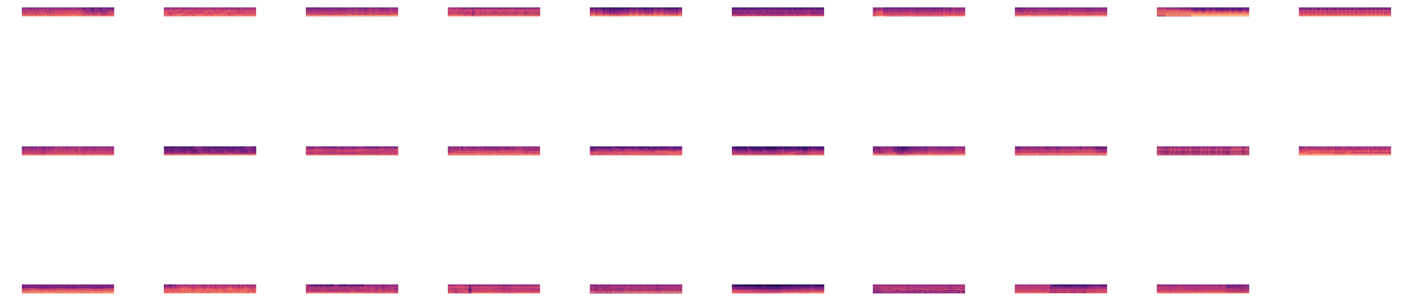

In [29]:
view_cluster(12)

In [30]:
# # this is just incase you want to see which value for k might be the best 
# sse = []
# list_k = list(range(3, 100))

# for k in list_k:
#     km = KMeans(n_clusters=k, random_state=22)
#     km.fit(feature_new)
    
#     sse.append(km.inertia_)

In [31]:
# # Plot sse against k
# fig = plt.figure(figsize=(20, 10))
# plt.plot(list_k, sse)
# plt.xlabel(r'Number of clusters *k*')
# plt.ylabel('Sum of squared distance')

# fig.savefig('k-means-elbow.png')

In [32]:
df = pd.DataFrame(songs, columns=['id'])

In [33]:
df['KMeansLabels'] = kmeans.labels_

In [34]:
# components
df_new = pd.DataFrame(feature_new, columns=['PC{}'.format(x + 1) for x in range(888)]) #len(feature.columns)
df_new

PC1        PC2        PC3       PC4        PC5        PC6  \
0     16.120216   9.952629   4.842518  2.789557  14.307912  -0.649167   
1      1.571017 -14.141863   5.674105  7.747112   2.090253  -6.134695   
2      8.019018   3.941514   5.486887  4.199418  -3.955093   5.551335   
3     13.884904  11.719335  -2.482008  9.814219  -8.935801  -4.792178   
4      9.911366  -6.374355  -6.980796  1.126857   3.060383  -1.249179   
...         ...        ...        ...       ...        ...        ...   
4829  16.701424   6.150545  -4.318105 -0.370375   3.765700  -1.052645   
4830   9.495754  11.459798   0.359844  8.866474   3.441380 -11.034254   
4831  20.873653 -13.713470 -11.506492 -1.924952 -11.104795  -5.523255   
4832  -1.095424   8.088050   9.105576  7.090230   5.501867   7.166394   
4833 -21.644421   4.600670  -3.782454 -6.600086  -3.225470  -3.310873   

           PC7       PC8       PC9      PC10  ...     PC879     PC880  \
0     1.688177 -0.439454  2.179914  4.160719  ...  0.131802  0.004360   
1     3.850517  0.223121  1.563327 -0.318979  ...  0.075838  0.096265   
2    -3.188052 -2.127009 -0.748706 -1.888162  ... -0.091622  0.091206   
3     1.096437 -3.706381 -4.035309 -3.836752  ... -0.113399 -0.065892   
4     0.157875 -4.575869  1.020122  1.853170  ...  0.196944 -0.120056   
...        ...       ...       ...       ...  ...       ...       ...   
4829  0.071708 -2.668519 -3.837429  4.928786  ...  0.083158  0.055327   
4830 -2.154775  2.115043 -0.489853 -3.117495  ... -0.009598  0.038465   
4831 -3.458253 -0.680597  2.350112  4.607629  ...  0.026712 -0.077318   
4832 -6.992864  6.491062  2.692085 -9.368362  ... -0.038820  0.150988   
4833  8.954508 -4.343606  6.462977 -2.529363  ...  0.177166  0.180893   

         PC881     PC882     PC883     PC884     PC885     PC886     PC887  \
0    -0.110019 -0.069092  0.212180  0.011273  0.040361 -0.048987  0.129741   
1     0.111629  0.102312 -0.003367 -0.090899  0.027061 -0.000589 -0.126680   
2    -0.302230 -0.049074  0.050861 -0.030855 -0.085994  0.050932 -0.020759   
3    -0.156799  0.021620 -0.087996  0.002614  0.042021  0.039199 -0.135137   
4    -0.005984  0.008932  0.100807 -0.075565 -0.027639  0.021115  0.142424   
...        ...       ...       ...       ...       ...       ...       ...   
4829  0.002922  0.009810 -0.011599  0.085935  0.077255 -0.148748  0.015017   
4830  0.178100 -0.017392 -0.005509  0.076150 -0.088400  0.208150  0.039944   
4831 -0.063295 -0.082102 -0.151246  0.114714  0.023398  0.026727  0.111057   
4832  0.230250  0.143824 -0.036511 -0.147358 -0.008356  0.076482  0.271839   
4833 -0.181362 -0.254907  0.030098  0.216724 -0.018421 -0.028208 -0.001883   

         PC888  
0     0.024021  
1     0.173490  
2    -0.189555  
3    -0.121017  
4    -0.093589  
...        ...  
4829 -0.000094  
4830  0.066385  
4831 -0.112599  
4832 -0.113068  
4833  0.033526  

[4834 rows x 888 columns]

In [35]:
df_new['id'] = df['id']
df_new['KMeansLabels'] = df['KMeansLabels']

In [36]:
df_new

PC1        PC2        PC3       PC4        PC5        PC6  \
0     16.120216   9.952629   4.842518  2.789557  14.307912  -0.649167   
1      1.571017 -14.141863   5.674105  7.747112   2.090253  -6.134695   
2      8.019018   3.941514   5.486887  4.199418  -3.955093   5.551335   
3     13.884904  11.719335  -2.482008  9.814219  -8.935801  -4.792178   
4      9.911366  -6.374355  -6.980796  1.126857   3.060383  -1.249179   
...         ...        ...        ...       ...        ...        ...   
4829  16.701424   6.150545  -4.318105 -0.370375   3.765700  -1.052645   
4830   9.495754  11.459798   0.359844  8.866474   3.441380 -11.034254   
4831  20.873653 -13.713470 -11.506492 -1.924952 -11.104795  -5.523255   
4832  -1.095424   8.088050   9.105576  7.090230   5.501867   7.166394   
4833 -21.644421   4.600670  -3.782454 -6.600086  -3.225470  -3.310873   

           PC7       PC8       PC9      PC10  ...     PC881     PC882  \
0     1.688177 -0.439454  2.179914  4.160719  ... -0.110019 -0.069092   
1     3.850517  0.223121  1.563327 -0.318979  ...  0.111629  0.102312   
2    -3.188052 -2.127009 -0.748706 -1.888162  ... -0.302230 -0.049074   
3     1.096437 -3.706381 -4.035309 -3.836752  ... -0.156799  0.021620   
4     0.157875 -4.575869  1.020122  1.853170  ... -0.005984  0.008932   
...        ...       ...       ...       ...  ...       ...       ...   
4829  0.071708 -2.668519 -3.837429  4.928786  ...  0.002922  0.009810   
4830 -2.154775  2.115043 -0.489853 -3.117495  ...  0.178100 -0.017392   
4831 -3.458253 -0.680597  2.350112  4.607629  ... -0.063295 -0.082102   
4832 -6.992864  6.491062  2.692085 -9.368362  ...  0.230250  0.143824   
4833  8.954508 -4.343606  6.462977 -2.529363  ... -0.181362 -0.254907   

         PC883     PC884     PC885     PC886     PC887     PC888          id  \
0     0.212180  0.011273  0.040361 -0.048987  0.129741  0.024021  064629.png   
1    -0.003367 -0.090899  0.027061 -0.000589 -0.126680  0.173490  127062.png   
2     0.050861 -0.030855 -0.085994  0.050932 -0.020759 -0.189555  131166.png   
3    -0.087996  0.002614  0.042021  0.039199 -0.135137 -0.121017  071230.png   
4     0.100807 -0.075565 -0.027639  0.021115  0.142424 -0.093589  143296.png   
...        ...       ...       ...       ...       ...       ...         ...   
4829 -0.011599  0.085935  0.077255 -0.148748  0.015017 -0.000094  064630.png   
4830 -0.005509  0.076150 -0.088400  0.208150  0.039944  0.066385  097960.png   
4831 -0.151246  0.114714  0.023398  0.026727  0.111057 -0.112599  062527.png   
4832 -0.036511 -0.147358 -0.008356  0.076482  0.271839 -0.113068  126417.png   
4833  0.030098  0.216724 -0.018421 -0.028208 -0.001883  0.033526  139537.png   

      KMeansLabels  
0               11  
1                1  
2               30  
3               48  
4               40  
...            ...  
4829            11  
4830            48  
4831            43  
4832            46  
4833             6  

[4834 rows x 890 columns]

In [37]:
df = df_new

In [38]:
df['id'] = df['id'].str[:6]
df['id']

0       064629
1       127062
2       131166
3       071230
4       143296
         ...  
4829    064630
4830    097960
4831    062527
4832    126417
4833    139537
Name: id, Length: 4834, dtype: object

In [39]:
os.getcwd()

'/Users/shoheisuzuki/workspace/euclidean-eukalyptus/work/music-recommender/Spectogram_Images'

In [40]:
os.chdir('/Users/shoheisuzuki/workspace/euclidean-eukalyptus/work/music-recommender')


In [41]:
pd.set_option('display.max_columns', None)

In [42]:
tracks = pd.read_csv('fma_metadata/tracks.csv', header=2)
tracks = tracks[['track_id', 'artist', 'title', 'genre']]


In [43]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   track_id  106574 non-null  int64 
 1   artist    106574 non-null  object
 2   title     106573 non-null  object
 3   genre     49598 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [44]:
df['id'] = df['id'].astype(str)
df['id'] = df['id'].apply(lambda x: x.zfill(6))

In [45]:
tracks['track_id'] = tracks['track_id'].astype(str)

In [46]:
tracks['track_id'] = pd.to_numeric(tracks['track_id'])
df['id'] = pd.to_numeric(df['id'])

In [47]:
df

PC1        PC2        PC3       PC4        PC5        PC6  \
0     16.120216   9.952629   4.842518  2.789557  14.307912  -0.649167   
1      1.571017 -14.141863   5.674105  7.747112   2.090253  -6.134695   
2      8.019018   3.941514   5.486887  4.199418  -3.955093   5.551335   
3     13.884904  11.719335  -2.482008  9.814219  -8.935801  -4.792178   
4      9.911366  -6.374355  -6.980796  1.126857   3.060383  -1.249179   
...         ...        ...        ...       ...        ...        ...   
4829  16.701424   6.150545  -4.318105 -0.370375   3.765700  -1.052645   
4830   9.495754  11.459798   0.359844  8.866474   3.441380 -11.034254   
4831  20.873653 -13.713470 -11.506492 -1.924952 -11.104795  -5.523255   
4832  -1.095424   8.088050   9.105576  7.090230   5.501867   7.166394   
4833 -21.644421   4.600670  -3.782454 -6.600086  -3.225470  -3.310873   

           PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0     1.688177 -0.439454  2.179914  4.160719 -0.558209 -3.861629 -0.141043   
1     3.850517  0.223121  1.563327 -0.318979  0.230147  0.215472 -5.332090   
2    -3.188052 -2.127009 -0.748706 -1.888162  6.101185  6.642908  6.732286   
3     1.096437 -3.706381 -4.035309 -3.836752 -2.618738  1.429552  1.279864   
4     0.157875 -4.575869  1.020122  1.853170  4.546521 -1.656055  3.846943   
...        ...       ...       ...       ...       ...       ...       ...   
4829  0.071708 -2.668519 -3.837429  4.928786 -2.513035 -6.128220  1.942117   
4830 -2.154775  2.115043 -0.489853 -3.117495  9.559396 -1.160547 -0.096077   
4831 -3.458253 -0.680597  2.350112  4.607629 -0.773813  4.726871  0.106358   
4832 -6.992864  6.491062  2.692085 -9.368362  3.054495 -0.850141  1.086539   
4833  8.954508 -4.343606  6.462977 -2.529363 -5.902812  6.922718 -3.890421   

          PC14      PC15      PC16      PC17      PC18      PC19      PC20  \
0     3.131647 -0.661938  0.342573 -1.155123  1.777738  3.395655 -2.130688   
1    -2.016625 -0.934510 -0.895689  4.629987 -1.293370 -2.254021  1.584607   
2     7.918846  0.856086  4.898700  0.139632 -0.178971 -0.193172  4.258257   
3    -1.198616 -4.031613  3.378914 -4.554435  2.091577  1.226072 -4.243361   
4     0.959708 -3.673688 -2.567853  2.314055  0.432989  2.731401 -3.116817   
...        ...       ...       ...       ...       ...       ...       ...   
4829  1.510637 -1.962476  3.931448  0.806591  0.631268  1.243743  0.871393   
4830  2.474898  3.236851 -0.709983 -2.503824  3.384340  3.480340  1.208596   
4831  0.572865  0.546533 -4.090090 -0.964269  2.576564 -1.838764  5.992117   
4832  3.321238  5.013010  2.360693  3.142560 -4.663891  1.483859  2.729471   
4833 -2.412193 -0.614606 -1.029282  1.080011 -1.624985 -2.388800 -1.018288   

          PC21      PC22      PC23      PC24      PC25      PC26      PC27  \
0    -3.103376  1.946261 -0.123285  0.710119 -1.324130 -0.046193 -2.426454   
1    -1.104685 -2.061357 -2.617327 -0.660754 -0.728479 -0.658506 -0.816660   
2    -3.815398 -0.315057  3.867805 -1.148838 -0.321296 -1.261381 -1.386645   
3     3.907971 -0.489493  2.507677  0.886787 -0.685419  0.517739  4.148153   
4    -0.993256 -0.231192 -1.873327  2.431598 -0.244465  0.886739 -0.049393   
...        ...       ...       ...       ...       ...       ...       ...   
4829 -0.442156 -1.823149  0.011529 -1.623778 -3.216096 -2.081073 -1.330231   
4830 -1.465128 -1.787763 -2.017119  1.205286 -4.080547 -1.674236  2.879285   
4831  4.406851  1.393237  1.253382 -2.270369 -1.584249  1.088545 -0.786343   
4832  0.631052 -1.268023  0.518115  3.272061  1.318550  2.238065 -1.683807   
4833 -2.309561  3.872514 -0.717337 -0.314242  1.473457 -2.323693 -2.663642   

          PC28      PC29      PC30      PC31      PC32      PC33      PC34  \
0    -3.296428  0.000871  2.871685  0.794101 -0.334794 -1.831304 -1.442050   
1    -1.852136  0.821587  1.796441 -2.213729 -0.183391  0.233555 -1.326323   
2    -1.941232  3.471596 -0.367075  0.876058  0.004399  4.670590 -1.021081   
3    -0.1101

In [48]:
df_merge = df.merge(tracks, left_on='id', right_on='track_id', how='left')
df_merge

PC1        PC2        PC3       PC4        PC5        PC6  \
0     16.120216   9.952629   4.842518  2.789557  14.307912  -0.649167   
1      1.571017 -14.141863   5.674105  7.747112   2.090253  -6.134695   
2      8.019018   3.941514   5.486887  4.199418  -3.955093   5.551335   
3     13.884904  11.719335  -2.482008  9.814219  -8.935801  -4.792178   
4      9.911366  -6.374355  -6.980796  1.126857   3.060383  -1.249179   
...         ...        ...        ...       ...        ...        ...   
4829  16.701424   6.150545  -4.318105 -0.370375   3.765700  -1.052645   
4830   9.495754  11.459798   0.359844  8.866474   3.441380 -11.034254   
4831  20.873653 -13.713470 -11.506492 -1.924952 -11.104795  -5.523255   
4832  -1.095424   8.088050   9.105576  7.090230   5.501867   7.166394   
4833 -21.644421   4.600670  -3.782454 -6.600086  -3.225470  -3.310873   

           PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0     1.688177 -0.439454  2.179914  4.160719 -0.558209 -3.861629 -0.141043   
1     3.850517  0.223121  1.563327 -0.318979  0.230147  0.215472 -5.332090   
2    -3.188052 -2.127009 -0.748706 -1.888162  6.101185  6.642908  6.732286   
3     1.096437 -3.706381 -4.035309 -3.836752 -2.618738  1.429552  1.279864   
4     0.157875 -4.575869  1.020122  1.853170  4.546521 -1.656055  3.846943   
...        ...       ...       ...       ...       ...       ...       ...   
4829  0.071708 -2.668519 -3.837429  4.928786 -2.513035 -6.128220  1.942117   
4830 -2.154775  2.115043 -0.489853 -3.117495  9.559396 -1.160547 -0.096077   
4831 -3.458253 -0.680597  2.350112  4.607629 -0.773813  4.726871  0.106358   
4832 -6.992864  6.491062  2.692085 -9.368362  3.054495 -0.850141  1.086539   
4833  8.954508 -4.343606  6.462977 -2.529363 -5.902812  6.922718 -3.890421   

          PC14      PC15      PC16      PC17      PC18      PC19      PC20  \
0     3.131647 -0.661938  0.342573 -1.155123  1.777738  3.395655 -2.130688   
1    -2.016625 -0.934510 -0.895689  4.629987 -1.293370 -2.254021  1.584607   
2     7.918846  0.856086  4.898700  0.139632 -0.178971 -0.193172  4.258257   
3    -1.198616 -4.031613  3.378914 -4.554435  2.091577  1.226072 -4.243361   
4     0.959708 -3.673688 -2.567853  2.314055  0.432989  2.731401 -3.116817   
...        ...       ...       ...       ...       ...       ...       ...   
4829  1.510637 -1.962476  3.931448  0.806591  0.631268  1.243743  0.871393   
4830  2.474898  3.236851 -0.709983 -2.503824  3.384340  3.480340  1.208596   
4831  0.572865  0.546533 -4.090090 -0.964269  2.576564 -1.838764  5.992117   
4832  3.321238  5.013010  2.360693  3.142560 -4.663891  1.483859  2.729471   
4833 -2.412193 -0.614606 -1.029282  1.080011 -1.624985 -2.388800 -1.018288   

          PC21      PC22      PC23      PC24      PC25      PC26      PC27  \
0    -3.103376  1.946261 -0.123285  0.710119 -1.324130 -0.046193 -2.426454   
1    -1.104685 -2.061357 -2.617327 -0.660754 -0.728479 -0.658506 -0.816660   
2    -3.815398 -0.315057  3.867805 -1.148838 -0.321296 -1.261381 -1.386645   
3     3.907971 -0.489493  2.507677  0.886787 -0.685419  0.517739  4.148153   
4    -0.993256 -0.231192 -1.873327  2.431598 -0.244465  0.886739 -0.049393   
...        ...       ...       ...       ...       ...       ...       ...   
4829 -0.442156 -1.823149  0.011529 -1.623778 -3.216096 -2.081073 -1.330231   
4830 -1.465128 -1.787763 -2.017119  1.205286 -4.080547 -1.674236  2.879285   
4831  4.406851  1.393237  1.253382 -2.270369 -1.584249  1.088545 -0.786343   
4832  0.631052 -1.268023  0.518115  3.272061  1.318550  2.238065 -1.683807   
4833 -2.309561  3.872514 -0.717337 -0.314242  1.473457 -2.323693 -2.663642   

          PC28      PC29      PC30      PC31      PC32      PC33      PC34  \
0    -3.296428  0.000871  2.871685  0.794101 -0.334794 -1.831304 -1.442050   
1    -1.852136  0.821587  1.796441 -2.213729 -0.183391  0.233555 -1.326323   
2    -1.941232  3.471596 -0.367075  0.876058  0.004399  4.670590 -1.021081   
3    -0.1101

In [49]:
df_cut = pd.concat([df_merge.pop(x) for x in ['id', 'KMeansLabels', 'track_id', 'artist', 'title', 'genre']], axis=1)

In [50]:
df_cut

id  KMeansLabels  track_id             artist  \
0      64629            11     64629       Blank & Kytt   
1     127062             1    127062     Robin Mitchell   
2     131166            30    131166        The Crypts!   
3      71230            48     71230                J-K   
4     143296            40    143296  Chase Alan Willis   
...      ...           ...       ...                ...   
4829   64630            11     64630       Blank & Kytt   
4830   97960            48     97960               Gilo   
4831   62527            43     62527      Tommy Tornado   
4832  126417            46    126417  Blue Dot Sessions   
4833  139537             6    139537        Dave Nelson   

                                      title          genre  
0                                      Rock        Hip-Hop  
1                             When I'm Gone           Folk  
2     Luck That's Dumb/Happy Birthday Dave!           Rock  
3                                  Kamikaze        Hip-Hop  
4                             Cartoon Faced   Instrumental  
...                                     ...            ...  
4829                                 Deniro        Hip-Hop  
4830                          Eu sou o fado     Electronic  
4831            Clear Vision feat. Soulmack  International  
4832                           Tyrano Theme   Instrumental  
4833                           Ride My Bike   Instrumental  

[4834 rows x 6 columns]

In [51]:
df_merge = df_cut.merge(df_merge, left_index=True, right_index=True)

In [52]:
df_merge

id  KMeansLabels  track_id             artist  \
0      64629            11     64629       Blank & Kytt   
1     127062             1    127062     Robin Mitchell   
2     131166            30    131166        The Crypts!   
3      71230            48     71230                J-K   
4     143296            40    143296  Chase Alan Willis   
...      ...           ...       ...                ...   
4829   64630            11     64630       Blank & Kytt   
4830   97960            48     97960               Gilo   
4831   62527            43     62527      Tommy Tornado   
4832  126417            46    126417  Blue Dot Sessions   
4833  139537             6    139537        Dave Nelson   

                                      title          genre        PC1  \
0                                      Rock        Hip-Hop  16.120216   
1                             When I'm Gone           Folk   1.571017   
2     Luck That's Dumb/Happy Birthday Dave!           Rock   8.019018   
3                                  Kamikaze        Hip-Hop  13.884904   
4                             Cartoon Faced   Instrumental   9.911366   
...                                     ...            ...        ...   
4829                                 Deniro        Hip-Hop  16.701424   
4830                          Eu sou o fado     Electronic   9.495754   
4831            Clear Vision feat. Soulmack  International  20.873653   
4832                           Tyrano Theme   Instrumental  -1.095424   
4833                           Ride My Bike   Instrumental -21.644421   

            PC2        PC3       PC4        PC5        PC6       PC7  \
0      9.952629   4.842518  2.789557  14.307912  -0.649167  1.688177   
1    -14.141863   5.674105  7.747112   2.090253  -6.134695  3.850517   
2      3.941514   5.486887  4.199418  -3.955093   5.551335 -3.188052   
3     11.719335  -2.482008  9.814219  -8.935801  -4.792178  1.096437   
4     -6.374355  -6.980796  1.126857   3.060383  -1.249179  0.157875   
...         ...        ...       ...        ...        ...       ...   
4829   6.150545  -4.318105 -0.370375   3.765700  -1.052645  0.071708   
4830  11.459798   0.359844  8.866474   3.441380 -11.034254 -2.154775   
4831 -13.713470 -11.506492 -1.924952 -11.104795  -5.523255 -3.458253   
4832   8.088050   9.105576  7.090230   5.501867   7.166394 -6.992864   
4833   4.600670  -3.782454 -6.600086  -3.225470  -3.310873  8.954508   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    -0.439454  2.179914  4.160719 -0.558209 -3.861629 -0.141043  3.131647   
1     0.223121  1.563327 -0.318979  0.230147  0.215472 -5.332090 -2.016625   
2    -2.127009 -0.748706 -1.888162  6.101185  6.642908  6.732286  7.918846   
3    -3.706381 -4.035309 -3.836752 -2.618738  1.429552  1.279864 -1.198616   
4    -4.575869  1.020122  1.853170  4.546521 -1.656055  3.846943  0.959708   
...        ...       ...       ...       ...       ...       ...       ...   
4829 -2.668519 -3.837429  4.928786 -2.513035 -6.128220  1.942117  1.510637   
4830  2.115043 -0.489853 -3.117495  9.559396 -1.160547 -0.096077  2.474898   
4831 -0.680597  2.350112  4.607629 -0.773813  4.726871  0.106358  0.572865   
4832  6.491062  2.692085 -9.368362  3.054495 -0.850141  1.086539  3.321238   
4833 -4.343606  6.462977 -2.529363 -5.902812  6.922718 -3.890421 -2.412193   

          PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0    -0.661938  0.342573 -1.155123  1.777738  3.395655 -2.130688 -3.103376   
1    -0.934510 -0.895689  4.629987 -1.293370 -2.254021  1.584607 -1.104685   
2     0.856086  4.898700  0.139632 -0.178971 -0.193172  4.258257 -3.815398   
3    -4.031613  3.378914 -4.554435  2.091577  1.226072 -4.243361  3.907971   
4    -3.673688 -2.567853  2.314055  0.432989  2.731401 -3.116817 -0.993256   
...        ...       ...       ...       ...       ...       ...       ...   
4829 -1.962476  3.931448  0.806591  0.631268  1.243743  0.871393 -0.442156  

In [53]:
df_merge.to_csv('track_features.csv', index=False)

In [54]:
feature['filenames'] = filenames

In [55]:
feature.set_index('filenames', inplace=True)

In [56]:
feature

0         1         2         3         4    5         6    7  \
filenames                                                                     
064629.png  0.0  0.276885  0.000000  0.525118  1.358259  0.0  5.603625  0.0   
127062.png  0.0  2.639676  0.000000  1.443202  1.828559  0.0  5.724163  0.0   
131166.png  0.0  2.475289  0.000000  1.703385  1.551151  0.0  4.414777  0.0   
071230.png  0.0  1.155072  0.000000  0.213467  2.855101  0.0  5.501060  0.0   
143296.png  0.0  1.419908  0.000000  0.596359  0.921858  0.0  6.341099  0.0   
...         ...       ...       ...       ...       ...  ...       ...  ...   
064630.png  0.0  1.134456  0.000000  1.257037  1.926351  0.0  6.060061  0.0   
097960.png  0.0  0.763911  0.000000  0.350312  2.407132  0.0  5.330967  0.0   
062527.png  0.0  2.380618  0.000000  1.237662  0.482639  0.0  7.054648  0.0   
126417.png  0.0  2.687991  0.000000  1.338039  0.954078  0.0  4.751172  0.0   
139537.png  0.0  2.410195  0.757577  0.154139  0.000000  0.0  5.577830  0.0   

              8    9        10        11        12   13   14   15        16  \
filenames                                                                     
064629.png  0.0  0.0  0.584280  0.827230  0.000000  0.0  0.0  0.0  0.000000   
127062.png  0.0  0.0  0.295128  0.000000  0.000000  0.0  0.0  0.0  0.457043   
131166.png  0.0  0.0  0.000000  0.285272  0.444489  0.0  0.0  0.0  0.000000   
071230.png  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.000000   
143296.png  0.0  0.0  0.000000  0.000000  0.144808  0.0  0.0  0.0  0.203733   
...         ...  ...       ...       ...       ...  ...  ...  ...       ...   
064630.png  0.0  0.0  0.000000  0.070636  0.000000  0.0  0.0  0.0  0.000000   
097960.png  0.0  0.0  0.000000  0.201655  0.000000  0.0  0.0  0.0  0.000000   
062527.png  0.0  0.0  0.872506  0.000000  0.000000  0.0  0.0  0.0  0.723758   
126417.png  0.0  0.0  0.000000  0.201071  0.671738  0.0  0.0  0.0  0.000000   
139537.png  0.0  0.0  0.036067  0.000000  0.558907  0.0  0.0  0.0  0.000000   

                  17   18        19   20        21        22        23   24  \
filenames                                                                     
064629.png  1.458254  0.0  0.631018  0.0  0.000000  0.000000  1.940375  0.0   
127062.png  1.414301  0.0  1.084178  0.0  0.000000  0.000000  4.800744  0.0   
131166.png  1.896177  0.0  0.123171  0.0  0.000000  0.000000  1.919853  0.0   
071230.png  2.952466  0.0  0.949993  0.0  0.000000  0.000000  1.725118  0.0   
143296.png  0.805754  0.0  1.589455  0.0  0.000000  0.000000  2.480980  0.0   
...              ...  ...       ...  ...       ...       ...       ...  ...   
064630.png  0.932552  0.0  0.839482  0.0  0.000000  0.102347  1.864767  0.0   
097960.png  0.967316  0.0  0.898237  0.0  0.000000  0.000000  2.769091  0.0   
062527.png  0.277561  0.0  0.536611  0.0  0.000000  0.000000  2.779128  0.0   
126417.png  3.687682  0.0  0.324274  0.0  0.183216  0.000000  2.575145  0.0   
139537.png  1.585142  0.0  0.000000  0.0  0.000000  0.000000  5.282129  0.0   

             25        26   27   28        29        30   31   32        33  \
filenames                                                                     
064629.png  0.0  0.000000  0.0  0.0  1.868034  0.166762  0.0  0.0  0.000000   
127062.png  0.0  0.000000  0.0  0.0  2.836449  0.514461  0.0  0.0  1.081236   
131166.png  0.0  0.000000  0.0  0.0  0.651910  0.384621  0.0  0.0  0.204611   
071230.png  0.0  0.000000  0.0  0.0  2.131590  0.000000  0.0  0.0  0.000000   
143296.png  0.0  0.000000  0.0  0.0  2.392480  0.601307  0.0  0.0  0.000000   
...         ...       ...  ...  ...       ...       ...  ...  ...       ...   
064630.png  0.0  0.000000  0.0  0.0  1.829841  0.318387  0.0  0.0  0.000000   
097960.png  0.0  0.000000  0.0  0.0  2.266873  0.543837  0.0  0.0  0.000000   
062527.png  0.0  0.000000  0.0  0.0  1.078542  0.000000  0.0  0.0  0.000000   
126417.png  0.0  0.000000  0.0  0.0  0.490376  1.245689  0.0 

In [57]:
feature[feature.index.str.startswith('064629.png')]

0         1    2         3         4    5         6    7    8  \
filenames                                                                     
064629.png  0.0  0.276885  0.0  0.525118  1.358259  0.0  5.603625  0.0  0.0   

              9       10       11   12   13   14   15   16        17   18  \
filenames                                                                   
064629.png  0.0  0.58428  0.82723  0.0  0.0  0.0  0.0  0.0  1.458254  0.0   

                  19   20   21   22        23   24   25   26   27   28  \
filenames                                                                
064629.png  0.631018  0.0  0.0  0.0  1.940375  0.0  0.0  0.0  0.0  0.0   

                  29        30   31   32   33   34        35       36  \
filenames                                                               
064629.png  1.868034  0.166762  0.0  0.0  0.0  0.0  2.086082  1.05449   

                  37        38   39   40        41   42       43   44  \
filenames                                                               
064629.png  3.683343  2.048673  0.0  0.0  1.487453  0.0  2.97402  0.0   

                  45   46        47   48        49   50   51   52        53  \
filenames                                                                     
064629.png  1.891832  0.0  0.408448  0.0  0.387476  0.0  0.0  0.0  1.722288   

             54   55   56   57        58   59   60   61        62   63   64  \
filenames                                                                     
064629.png  0.0  0.0  0.0  0.0  2.316714  0.0  0.0  0.0  0.010481  0.0  0.0   

                  65        66   67        68   69   70        71   72   73  \
filenames                                                                     
064629.png  3.804585  2.506136  0.0  1.864135  0.0  0.0  2.837617  0.0  0.0   

                  74   75        76   77   78        79        80        81  \
filenames                                                                     
064629.png  0.289735  0.0  2.104319  0.0  0.0  0.830839  0.196231  0.684985   

             82   83        84   85   86        87        88        89  \
filenames                                                                
064629.png  0.0  0.0  1.940309  0.0  0.0  2.892905  0.263491  0.314368   

                  90   91       92        93   94   95   96   97   98  \
filenames                                                               
064629.png  2.124729  0.0  0.13418  0.776195  0.0  0.0  0.0  0.0  0.0   

                 99  100  101  102  103       104  105       106  107  108  \
filenames                                                                    
064629.png  3.48028  0.0  0.0  0.0  0.0  0.858884  0.0  1.142027  0.0  0.0   

                 109  110  111  112       113  114  115  116       117  118  \
filenames                                                                     
064629.png  0.890818  0.0  0.0  0.0  0.458198  0.0  0.0  0.0  0.814896  0.0   

            119       120  121  122  123       124       125  126  127  \
filenames                                                                
064629.png  0.0  0.185356  0.0  0.0  0.0  0.438141  1.223403  0.0  0.0   

                 128  129       130       131  132  133  134       135  136  \
filenames                                                                     
064629.png  0.931905  0.0  0.477871  4.529806  0.0  0.0  0.0  1.671599  0.0   

                 137  138       139       140  141  142       143     144  \
filenames                                                                   
064629.png  0.897668  0.0  2.261035  0.008134  0.0  0.0  0.028048  0.6875   

            145  146       147  148       149  150       151  152       153  \
filenames                                                                     
064629.png  0.0  0.0  0.022634  0.0  2.883406  0.0  2.874899  0.0  1.263906   

            154  155       156  157  158  159  160       161       162  163  \
fil

In [58]:
from scipy import spatial


result = 1 - spatial.distance.cosine(feature[feature.index.str.startswith('064629.png')], feature[feature.index.str.startswith('127062.png')])

In [59]:
result

0.864745020866394

In [60]:
feature_matrix = df_merge.drop(['KMeansLabels', 'track_id', 'artist', 'title', 'genre'], axis=1).set_index('id')
feature_matrix

PC1        PC2        PC3       PC4        PC5        PC6  \
id                                                                        
64629   16.120216   9.952629   4.842518  2.789557  14.307912  -0.649167   
127062   1.571017 -14.141863   5.674105  7.747112   2.090253  -6.134695   
131166   8.019018   3.941514   5.486887  4.199418  -3.955093   5.551335   
71230   13.884904  11.719335  -2.482008  9.814219  -8.935801  -4.792178   
143296   9.911366  -6.374355  -6.980796  1.126857   3.060383  -1.249179   
...           ...        ...        ...       ...        ...        ...   
64630   16.701424   6.150545  -4.318105 -0.370375   3.765700  -1.052645   
97960    9.495754  11.459798   0.359844  8.866474   3.441380 -11.034254   
62527   20.873653 -13.713470 -11.506492 -1.924952 -11.104795  -5.523255   
126417  -1.095424   8.088050   9.105576  7.090230   5.501867   7.166394   
139537 -21.644421   4.600670  -3.782454 -6.600086  -3.225470  -3.310873   

             PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
id                                                                             
64629   1.688177 -0.439454  2.179914  4.160719 -0.558209 -3.861629 -0.141043   
127062  3.850517  0.223121  1.563327 -0.318979  0.230147  0.215472 -5.332090   
131166 -3.188052 -2.127009 -0.748706 -1.888162  6.101185  6.642908  6.732286   
71230   1.096437 -3.706381 -4.035309 -3.836752 -2.618738  1.429552  1.279864   
143296  0.157875 -4.575869  1.020122  1.853170  4.546521 -1.656055  3.846943   
...          ...       ...       ...       ...       ...       ...       ...   
64630   0.071708 -2.668519 -3.837429  4.928786 -2.513035 -6.128220  1.942117   
97960  -2.154775  2.115043 -0.489853 -3.117495  9.559396 -1.160547 -0.096077   
62527  -3.458253 -0.680597  2.350112  4.607629 -0.773813  4.726871  0.106358   
126417 -6.992864  6.491062  2.692085 -9.368362  3.054495 -0.850141  1.086539   
139537  8.954508 -4.343606  6.462977 -2.529363 -5.902812  6.922718 -3.890421   

            PC14      PC15      PC16      PC17      PC18      PC19      PC20  \
id                                                                             
64629   3.131647 -0.661938  0.342573 -1.155123  1.777738  3.395655 -2.130688   
127062 -2.016625 -0.934510 -0.895689  4.629987 -1.293370 -2.254021  1.584607   
131166  7.918846  0.856086  4.898700  0.139632 -0.178971 -0.193172  4.258257   
71230  -1.198616 -4.031613  3.378914 -4.554435  2.091577  1.226072 -4.243361   
143296  0.959708 -3.673688 -2.567853  2.314055  0.432989  2.731401 -3.116817   
...          ...       ...       ...       ...       ...       ...       ...   
64630   1.510637 -1.962476  3.931448  0.806591  0.631268  1.243743  0.871393   
97960   2.474898  3.236851 -0.709983 -2.503824  3.384340  3.480340  1.208596   
62527   0.572865  0.546533 -4.090090 -0.964269  2.576564 -1.838764  5.992117   
126417  3.321238  5.013010  2.360693  3.142560 -4.663891  1.483859  2.729471   
139537 -2.412193 -0.614606 -1.029282  1.080011 -1.624985 -2.388800 -1.018288   

            PC21      PC22      PC23      PC24      PC25      PC26      PC27  \
id                                                                             
64629  -3.103376  1.946261 -0.123285  0.710119 -1.324130 -0.046193 -2.426454   
127062 -1.104685 -2.061357 -2.617327 -0.660754 -0.728479 -0.658506 -0.816660   
131166 -3.815398 -0.315057  3.867805 -1.148838 -0.321296 -1.261381 -1.386645   
71230   3.907971 -0.489493  2.507677  0.886787 -0.685419  0.517739  4.148153   
143296 -0.993256 -0.231192 -1.873327  2.431598 -0.244465  0.886739 -0.049393   
...          ...       ...       ...       ...       ...       ...       ...   
64630  -0.442156 -1.823149  0.011529 -1.623778 -3.216096 -2.081073 -1.330231   
97960  -1.465128 -1.787763 -2.017119  1.205286 -4.080547 -1.674236  2.879285   
62527   4.406851  1.393237  1.253382 -2.270369 -1.584249  1.088545 -0.786343   
126417  0.631052 -1.268023  0.518115  3.272061  1.318550  2.238065 -1.683807

In [61]:
feature_matrix.to_csv('feature_matrix.csv', index=True)

In [62]:
pd.read_csv('feature_matrix.csv', index_col='id')

PC1        PC2        PC3       PC4        PC5        PC6  \
id                                                                        
64629   16.120216   9.952629   4.842518  2.789557  14.307912  -0.649167   
127062   1.571017 -14.141863   5.674105  7.747112   2.090253  -6.134695   
131166   8.019018   3.941514   5.486887  4.199418  -3.955093   5.551335   
71230   13.884904  11.719335  -2.482007  9.814219  -8.935801  -4.792178   
143296   9.911366  -6.374355  -6.980796  1.126857   3.060383  -1.249178   
...           ...        ...        ...       ...        ...        ...   
64630   16.701424   6.150545  -4.318105 -0.370375   3.765700  -1.052645   
97960    9.495754  11.459798   0.359844  8.866474   3.441380 -11.034254   
62527   20.873653 -13.713470 -11.506492 -1.924952 -11.104795  -5.523255   
126417  -1.095424   8.088050   9.105576  7.090230   5.501867   7.166394   
139537 -21.644420   4.600670  -3.782455 -6.600086  -3.225470  -3.310873   

             PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
id                                                                             
64629   1.688177 -0.439454  2.179915  4.160719 -0.558209 -3.861629 -0.141043   
127062  3.850517  0.223121  1.563327 -0.318979  0.230147  0.215472 -5.332090   
131166 -3.188052 -2.127009 -0.748706 -1.888162  6.101185  6.642908  6.732286   
71230   1.096437 -3.706381 -4.035309 -3.836752 -2.618738  1.429552  1.279864   
143296  0.157875 -4.575869  1.020122  1.853170  4.546521 -1.656055  3.846943   
...          ...       ...       ...       ...       ...       ...       ...   
64630   0.071708 -2.668519 -3.837429  4.928786 -2.513035 -6.128220  1.942117   
97960  -2.154775  2.115043 -0.489853 -3.117495  9.559396 -1.160547 -0.096077   
62527  -3.458253 -0.680597  2.350112  4.607629 -0.773813  4.726871  0.106358   
126417 -6.992864  6.491062  2.692085 -9.368362  3.054495 -0.850140  1.086539   
139537  8.954508 -4.343606  6.462977 -2.529363 -5.902812  6.922718 -3.890421   

            PC14      PC15      PC16      PC17      PC18      PC19      PC20  \
id                                                                             
64629   3.131647 -0.661938  0.342573 -1.155123  1.777738  3.395655 -2.130688   
127062 -2.016625 -0.934510 -0.895689  4.629987 -1.293370 -2.254021  1.584607   
131166  7.918846  0.856086  4.898700  0.139632 -0.178971 -0.193172  4.258257   
71230  -1.198616 -4.031613  3.378914 -4.554435  2.091577  1.226072 -4.243361   
143296  0.959708 -3.673688 -2.567853  2.314055  0.432989  2.731401 -3.116817   
...          ...       ...       ...       ...       ...       ...       ...   
64630   1.510637 -1.962476  3.931447  0.806591  0.631268  1.243743  0.871393   
97960   2.474898  3.236851 -0.709983 -2.503824  3.384340  3.480339  1.208595   
62527   0.572865  0.546533 -4.090090 -0.964268  2.576564 -1.838764  5.992117   
126417  3.321238  5.013009  2.360693  3.142559 -4.663891  1.483859  2.729471   
139537 -2.412193 -0.614606 -1.029282  1.080011 -1.624985 -2.388800 -1.018288   

            PC21      PC22      PC23      PC24      PC25      PC26      PC27  \
id                                                                             
64629  -3.103376  1.946261 -0.123285  0.710119 -1.324130 -0.046193 -2.426454   
127062 -1.104685 -2.061357 -2.617327 -0.660754 -0.728479 -0.658506 -0.816660   
131166 -3.815398 -0.315057  3.867805 -1.148838 -0.321296 -1.261381 -1.386645   
71230   3.907971 -0.489493  2.507677  0.886787 -0.685419  0.517739  4.148153   
143296 -0.993256 -0.231192 -1.873327  2.431598 -0.244465  0.886739 -0.049393   
...          ...       ...       ...       ...       ...       ...       ...   
64630  -0.442156 -1.823149  0.011529 -1.623778 -3.216096 -2.081073 -1.330231   
97960  -1.465128 -1.787763 -2.017119  1.205286 -4.080547 -1.674236  2.879285   
62527   4.406851  1.393237  1.253382 -2.270369 -1.584250  1.088545 -0.786343   
126417  0.631052 -1.268023  0.518115  3.272061  1.318550  2.238065 -1.683807

In [63]:
feature_matrix.query('index==127062')

PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
id                                                                              
127062  1.571017 -14.141863  5.674105  7.747112  2.090253 -6.134695  3.850517   

             PC8       PC9      PC10      PC11      PC12     PC13      PC14  \
id                                                                            
127062  0.223121  1.563327 -0.318979  0.230147  0.215472 -5.33209 -2.016625   

           PC15      PC16      PC17     PC18      PC19      PC20      PC21  \
id                                                                           
127062 -0.93451 -0.895689  4.629987 -1.29337 -2.254021  1.584607 -1.104685   

            PC22      PC23      PC24      PC25      PC26     PC27      PC28  \
id                                                                            
127062 -2.061357 -2.617327 -0.660754 -0.728479 -0.658506 -0.81666 -1.852136   

            PC29      PC30      PC31      PC32      PC33      PC34     PC35  \
id                                                                            
127062  0.821587  1.796441 -2.213729 -0.183391  0.233555 -1.326323 -0.07603   

            PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
id                                                                             
127062 -1.146742  1.636329 -0.214625  1.050877  0.525511  2.742393 -1.249613   

            PC43      PC44      PC45      PC46     PC47      PC48      PC49  \
id                                                                            
127062  1.478424  0.899029  2.892237  2.273839 -2.75745 -0.639175 -0.281639   

            PC50     PC51      PC52      PC53      PC54      PC55      PC56  \
id                                                                            
127062  0.007713 -0.52506  0.355342  0.329334 -0.497801  0.149903  0.294922   

            PC57      PC58     PC59      PC60     PC61      PC62     PC63  \
id                                                                          
127062 -0.292875  0.171041  1.29183  0.003566  0.78266 -0.560644  1.42093   

            PC64     PC65      PC66      PC67      PC68      PC69      PC70  \
id                                                                            
127062  0.487741  0.99697  1.147135 -0.084907  0.199749  0.374117  0.075205   

            PC71      PC72      PC73      PC74      PC75      PC76      PC77  \
id                                                                             
127062 -0.749356  1.166867  0.961551  0.132617 -1.002892 -0.200799 -1.312293   

           PC78      PC79      PC80     PC81      PC82      PC83      PC84  \
id                                                                           
127062  0.41114  0.102111 -1.546699  0.59191  0.510027  0.168774 -0.464768   

            PC85      PC86      PC87      PC88      PC89      PC90      PC91  \
id                                                                             
127062  1.183118 -0.126528  0.236557 -0.182906 -0.049344 -0.462675 -0.415653   

            PC92      PC93      PC94      PC95      PC96      PC97      PC98  \
id                                                                             
127062 -0.738378 -0.143476 -0.143696 -0.901055 -0.659622 -0.252531 -0.340333   

            PC99     PC100    PC101     PC102     PC103     PC104     PC105  \
id                                                                            
127062 -0.259799  0.575812  0.52661 -0.397367 -0.507375 -0.923154  0.235744   

           PC106     PC107     PC108     PC109     PC110     PC111     PC112  \
id                                                                             
127062 -0.346599  0.422547 -0.004218 -0.651547 -0.281648 -0.094397 -0.683382   

           PC113     PC114     PC115     PC116     PC117     PC118     PC119  \
id                                                                             
127062 -0.622953 -0.310812  0.325723

In [64]:
song_label = df_cut.set_index('id').drop('track_id', axis=1)
song_label

KMeansLabels             artist  \
id                                        
64629             11       Blank & Kytt   
127062             1     Robin Mitchell   
131166            30        The Crypts!   
71230             48                J-K   
143296            40  Chase Alan Willis   
...              ...                ...   
64630             11       Blank & Kytt   
97960             48               Gilo   
62527             43      Tommy Tornado   
126417            46  Blue Dot Sessions   
139537             6        Dave Nelson   

                                        title          genre  
id                                                            
64629                                    Rock        Hip-Hop  
127062                          When I'm Gone           Folk  
131166  Luck That's Dumb/Happy Birthday Dave!           Rock  
71230                                Kamikaze        Hip-Hop  
143296                          Cartoon Faced   Instrumental  
...                                       ...            ...  
64630                                  Deniro        Hip-Hop  
97960                           Eu sou o fado     Electronic  
62527             Clear Vision feat. Soulmack  International  
126417                           Tyrano Theme   Instrumental  
139537                           Ride My Bike   Instrumental  

[4834 rows x 4 columns]

In [65]:
song_label.to_csv('song_label.csv', index=True)

In [66]:
pd.read_csv('song_label.csv', index_col='id')

KMeansLabels             artist  \
id                                        
64629             11       Blank & Kytt   
127062             1     Robin Mitchell   
131166            30        The Crypts!   
71230             48                J-K   
143296            40  Chase Alan Willis   
...              ...                ...   
64630             11       Blank & Kytt   
97960             48               Gilo   
62527             43      Tommy Tornado   
126417            46  Blue Dot Sessions   
139537             6        Dave Nelson   

                                        title          genre  
id                                                            
64629                                    Rock        Hip-Hop  
127062                          When I'm Gone           Folk  
131166  Luck That's Dumb/Happy Birthday Dave!           Rock  
71230                                Kamikaze        Hip-Hop  
143296                          Cartoon Faced   Instrumental  
...                                       ...            ...  
64630                                  Deniro        Hip-Hop  
97960                           Eu sou o fado     Electronic  
62527             Clear Vision feat. Soulmack  International  
126417                           Tyrano Theme   Instrumental  
139537                           Ride My Bike   Instrumental  

[4834 rows x 4 columns]

In [67]:
song_label.query('index==96728').to_numpy()

array([[1, 'Allysen Callery', 'All In The Morning Coming Down', 'Folk']],
      dtype=object)

In [68]:
song_label.index[1]

127062

In [74]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(feature_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [70]:
with open('./model/knn_recommender.pkl', 'wb') as file:
    pickle.dump(model, file)

2022-03-07 12:18:26.377580: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://8fa9dbcc-3735-44e8-ac0d-ebb29abd1ae8/assets


In [71]:
with open ('./model/knn_recommender.pkl', 'rb') as file:
    model_knn = pickle.load(file)

In [72]:
pca_components = pca.transform(extract_features('test/000207.png', model))
pca_components.shape

(1, 888)

In [75]:
distances, indices = model_knn.kneighbors(pca_components, n_neighbors = 20)

/Users/shoheisuzuki/miniforge3/envs/music-recommendation/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [76]:
from thefuzz import fuzz
from thefuzz import process

key = 'I had a lover I thought'

choices = song_label['title']

# matches = (process.extract(key, choices, scorer = fuzz.token_set_ratio, limit = 5))
# print('\n'.join(map(str, matches)))

# top match
print(process.extractOne(key, choices, scorer = fuzz.ratio, score_cutoff = 50)[0])


I Had A Lover I Thought Was My Own


In [77]:
titles = song_label.loc[96728]['title']
titles

'All In The Morning Coming Down'

In [78]:
song_label

KMeansLabels             artist  \
id                                        
64629             11       Blank & Kytt   
127062             1     Robin Mitchell   
131166            30        The Crypts!   
71230             48                J-K   
143296            40  Chase Alan Willis   
...              ...                ...   
64630             11       Blank & Kytt   
97960             48               Gilo   
62527             43      Tommy Tornado   
126417            46  Blue Dot Sessions   
139537             6        Dave Nelson   

                                        title          genre  
id                                                            
64629                                    Rock        Hip-Hop  
127062                          When I'm Gone           Folk  
131166  Luck That's Dumb/Happy Birthday Dave!           Rock  
71230                                Kamikaze        Hip-Hop  
143296                          Cartoon Faced   Instrumental  
...                                       ...            ...  
64630                                  Deniro        Hip-Hop  
97960                           Eu sou o fado     Electronic  
62527             Clear Vision feat. Soulmack  International  
126417                           Tyrano Theme   Instrumental  
139537                           Ride My Bike   Instrumental  

[4834 rows x 4 columns]

In [79]:
song_label_2 = song_label.reset_index()

In [80]:
song_label_2 = song_label_2.set_index('title')

In [81]:
song_label_2

id  KMeansLabels  \
title                                                         
Rock                                    64629            11   
When I'm Gone                          127062             1   
Luck That's Dumb/Happy Birthday Dave!  131166            30   
Kamikaze                                71230            48   
Cartoon Faced                          143296            40   
...                                       ...           ...   
Deniro                                  64630            11   
Eu sou o fado                           97960            48   
Clear Vision feat. Soulmack             62527            43   
Tyrano Theme                           126417            46   
Ride My Bike                           139537             6   

                                                  artist          genre  
title                                                                    
Rock                                        Blank & Kytt        Hip-Hop  
When I'm Gone                             Robin Mitchell           Folk  
Luck That's Dumb/Happy Birthday Dave!        The Crypts!           Rock  
Kamikaze                                             J-K        Hip-Hop  
Cartoon Faced                          Chase Alan Willis   Instrumental  
...                                                  ...            ...  
Deniro                                      Blank & Kytt        Hip-Hop  
Eu sou o fado                                       Gilo     Electronic  
Clear Vision feat. Soulmack                Tommy Tornado  International  
Tyrano Theme                           Blue Dot Sessions   Instrumental  
Ride My Bike                                 Dave Nelson   Instrumental  

[4834 rows x 4 columns]

In [82]:
song_label_2.loc['Rock']['id']

64629

In [83]:
def name_to_id(title):
    '''
    converts movie title to id for use in algorithms
    '''
    song_label_2 = song_label.reset_index()
    song_label_2 = song_label_2.set_index('title')
    song_label_2.loc[title]['id']
    return id

In [84]:
name_to_id('Rock')

<function id(obj, /)>

In [87]:
feature_matrix.index[indices.flatten()[i]]

126231

In [86]:
for i in range(0, len(distances.flatten())):
    id = feature_matrix.index[indices.flatten()[i]]
    labels = song_label.query('index==@id').to_numpy()
    print('{0}: {1} {2}, with distance of {3}:'.format(i, id, labels, distances.flatten()[i]))         

0: 207 [[46 'Ed Askew' 'Piano 3' 'Folk']], with distance of 0.0:
1: 197 [[19 'Ed Askew' 'Piano 2' 'Folk']], with distance of 0.32756680250167847:
2: 126416 [[46 'Blue Dot Sessions' 'Stakes and Things' 'Instrumental']], with distance of 0.3350861072540283:
3: 111747 [[46 'Soko' 'We Might Be Dead By Tomorrow' 'Rock']], with distance of 0.3417384624481201:
4: 144472 [[46 'Nick Jaina' 'Saw You On the Train Last Night (Instrumental)' 'Folk']], with distance of 0.35446423292160034:
5: 7388 [[46 'Lucky Dragons' 'girlworld (3 in a bed mix)' 'Experimental']], with distance of 0.36444228887557983:
6: 116468 [[46 'Blue Dot Sessions' 'Theme' 'Instrumental']], with distance of 0.36911553144454956:
7: 117160 [[46 'Blue Dot Sessions' 'The Stasis' 'Instrumental']], with distance of 0.395624041557312:
8: 37111 [[46 'Nigel Simmons' "Devil's Candy Shop" 'Instrumental']], with distance of 0.3957134485244751:
9: 78847 [[35 'Stray' 'Como Uma Lesma' 'Hip-Hop']], with distance of 0.39605969190597534:
10: 1276